University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sys

from tueplots import bundles
from tueplots.constants.color import rgb

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays

## Import data

In [2]:
df_dict = read_data('../dat/results/exp_006/avg_gain/')
cities = list(df_dict.keys())
cities.sort()
df_mean_delays = get_mean_delays(df_dict)['avg_gain']
switch_times_array = list(range(1,61,1))
df_mean_delays["switch_times"] = switch_times_array

Berlin Hbf
Bremen Hbf
Dortmund Hbf
Dresden Hbf
Duesseldorf Hbf
Duisburg Hbf
Erfurt Hbf
Essen Hbf
Hamburg Hbf
Hannover Hbf
Karlsruhe Hbf
Kiel Hbf
Koeln Hbf
Leipzig Hbf
Magdeburg Hbf
Mainz Hbf
Muenchen Hbf
Nuernberg Hbf
Potsdam Hbf
Saarbruecken Hbf
Schwerin Hbf
Stuttgart Hbf
Wiesbaden Hbf


## Mean delay at destination

In [3]:
empty = pd.DataFrame(columns=cities, index=cities)

# Data processing
df_mean = empty.copy()
df_median = empty.copy()

for key, df in df_dict.items():
    df["meanDelay"] =df["delay"].apply(np.mean)
    df["medianDelay"] = df["delay"].apply(np.median)
    array_mean = df["delay"].apply(np.nanmean).round()
    array_median = df["delay"].apply(np.median)

    df_mean.loc[key] = array_mean
    df_median.loc[key] = array_median


df_mean = df_mean.fillna(np.nan)

c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\algorithms.py:1814: RuntimeWarning: Mean of empty slice
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\jb\AppData\Local\Programs\Pyt

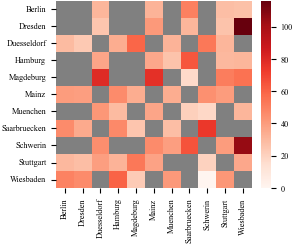

In [4]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))
plt.rcParams['font.serif'] = 'Times New Roman'  # Or another available font
plt.rcParams['font.family'] = 'serif'


df_mean.drop('Potsdam Hbf', inplace=True)
del df_mean['Potsdam Hbf']

# choose stations
state_capitals = [
    "Berlin Hbf", "Hamburg Hbf", "Muenchen Hbf", "Stuttgart Hbf", 
    "Duesseldorf Hbf", "Mainz Hbf", "Wiesbaden Hbf", "Saarbruecken Hbf", 
    "Schwerin Hbf", "Dresden Hbf", "Magdeburg Hbf", 
]

cleaned_capitals = [city.replace(' Hbf', '') for city in state_capitals]

df_mean.index = df_mean.index.str.replace(' Hbf', '')
df_mean.columns = df_mean.columns.str.replace(' Hbf', '')

df_filtered = df_mean.loc[cleaned_capitals, cleaned_capitals]

df_done = df_filtered.sort_index().sort_index(axis=1)
plt.figure(figsize=(3, 2.5))

cmap = sns.color_palette("Reds", as_cmap=True)
cmap.set_bad('gray') 

# Plot the heatmap
heatmap = sns.heatmap(df_done, annot=False, cmap=cmap, cbar=True, 
                      vmin=0, vmax=df_mean.max().max())  

plt.savefig("plot_meanDelay_heatmap_reds.pdf", format="pdf")

plt.show()